# Investigating LSE Department's digital presence on Twitter

### Part 1: Introduction

This project aims to find out whether LSE departments should use Twitter to communicate with LSE students. During COVID-19, most events moved online, and most organisations had to improve their digital presence to adapt. Despite activities slowly returning to normal, having an online presence is still extremely important. Therefore, exploring whether Twitter is an effective social media platform to use to improve the department's digital presence is a topic worth exploring.

We can explore the statement above by carrying out an analysis similar to social media analytics. To find out whether Twitter is an adequate social media platform, we may want to answer these few questions:
1. What defines a successful Twitter account?
2. Does Twitter have an active audience that's worth maintaining?
3. Is it easy to grow on Twitter? Do tweets often get shared enough to encourage growth of a Twitter account?
4. Does a department need positive attention to be successful? Or can negative attention make the account successful too?

### Part 2: Data Collection

To answer the questions above, we have to collect variations of information for each department. For example, we could gather information like the number of followers, types, numbers of engagements, and the sentiments of replies and mentions for each account. Using different combinations of information, we can find out whether Twitter is an adequate social media platform.

We can collect all the information needed from Twitter itself. There are a few limitations to using Twitter API calls. For example, there are limits to the API calls we can make. I will explain more of the constraints when extracting more data. 

To start, we will call the list of departments at the LSE. We do this in order to search up the related accounts on Twitter.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from bs4 import BeautifulSoup
import requests
import json

In [3]:
url = "https://info.lse.ac.uk/staff/departments-and-institutes" #List of LSE departments and institutes
response = requests.get(url)
soup = BeautifulSoup(response.content, "lxml")

In [4]:
raw_list = soup.find_all('ul')

In [5]:
dept = []

for tag in raw_list:
    list_el = tag.text.strip()
    dept.append(list_el)

In [6]:
depts = dept[2:]
depts

['Department of Accounting\nDepartment of Anthropology\nData Science Institute\nDepartment of Economics\nDepartment of Economic History\nEuropean Institute\nDepartment of Finance\nFiroz Lalji Institute for Africa\nDepartment of Gender Studies\nDepartment of Geography and Environment\nDepartment of Government\nDepartment of Health Policy\nDepartment of International Development\nDepartment of International History\nInternational Inequalities Institute\nDepartment of International Relations\nLanguage Centre\nLSE Law School\nDepartment of Management\nMarshall Institute\nDepartment of Mathematics\nDepartment of Media and Communications\nDepartment of Methodology\nDepartment of Philosophy, Logic and Scientific Method\nDepartment of Psychological and Behavioural Science\nSchool of Public Policy (formerly Institute of Public Affairs)\nDepartment of Social Policy\nDepartment of Sociology\nDepartment of Statistics']

In [7]:
dept_list = depts[0].split("\n")
dept_list

['Department of Accounting',
 'Department of Anthropology',
 'Data Science Institute',
 'Department of Economics',
 'Department of Economic History',
 'European Institute',
 'Department of Finance',
 'Firoz Lalji Institute for Africa',
 'Department of Gender Studies',
 'Department of Geography and Environment',
 'Department of Government',
 'Department of Health Policy',
 'Department of International Development',
 'Department of International History',
 'International Inequalities Institute',
 'Department of International Relations',
 'Language Centre',
 'LSE Law School',
 'Department of Management',
 'Marshall Institute',
 'Department of Mathematics',
 'Department of Media and Communications',
 'Department of Methodology',
 'Department of Philosophy, Logic and Scientific Method',
 'Department of Psychological and Behavioural Science',
 'School of Public Policy (formerly Institute of Public Affairs)',
 'Department of Social Policy',
 'Department of Sociology',
 'Department of Statisti

In this project, I have only decided to look at LSE departments. Institutes tend to have massive followings and digital presences because they're more of a community than a department. It wouldn't be a fair comparison. Therefore, we won't be looking into Institutes.

In [8]:
#Remove all elements in the list with the word Institute as we are looking only at Departments
indices = [dept_list.index("Data Science Institute"), dept_list.index("European Institute"), 
           dept_list.index("Firoz Lalji Institute for Africa"), dept_list.index("International Inequalities Institute"),
           dept_list.index("Marshall Institute"), 
           dept_list.index("School of Public Policy (formerly Institute of Public Affairs)")]

In [9]:
dept_list = [i for j, i in enumerate(dept_list) if j not in indices]
dept_list #Final list of departments

['Department of Accounting',
 'Department of Anthropology',
 'Department of Economics',
 'Department of Economic History',
 'Department of Finance',
 'Department of Gender Studies',
 'Department of Geography and Environment',
 'Department of Government',
 'Department of Health Policy',
 'Department of International Development',
 'Department of International History',
 'Department of International Relations',
 'Language Centre',
 'LSE Law School',
 'Department of Management',
 'Department of Mathematics',
 'Department of Media and Communications',
 'Department of Methodology',
 'Department of Philosophy, Logic and Scientific Method',
 'Department of Psychological and Behavioural Science',
 'Department of Social Policy',
 'Department of Sociology',
 'Department of Statistics']

Based on the department list above, I've collected the list of Twitter usernames for each department manually because there isn't a compiled list of the department's Twitter handles.

In [10]:
usernames = ['LSE_Accounting', 'LSEAnthropology', 'LSEEcon',
            'LSEEcHist', 'LSEfinance', 'LSEGenderTweet', 'LSEGeography',
            'LSEGovernment', 'LSEHealthPolicy', 'LSE_ID', 'lsehistory',
            'LSEIRDept', 'lselangcentre', 'LSELaw', 'LSEManagement', 'LSEMaths',
            'MediaLSE', 'MethodologyLSE', 'LSEPhilosophy', 'LSEBehavioural', 
            'LSESocialPolicy', 'LSEsociology', 'LSEStatistics']

In [11]:
import pandas as pd

dept_usernames = pd.DataFrame({
    'Department': dept_list,
    'Twitter username': usernames
})

dept_usernames['Department'] = dept_usernames['Department'].str.replace('Department of ', '')
dept_usernames

Department Twitter username
0                                Accounting   LSE_Accounting
1                              Anthropology  LSEAnthropology
2                                 Economics          LSEEcon
3                          Economic History        LSEEcHist
4                                   Finance       LSEfinance
5                            Gender Studies   LSEGenderTweet
6                 Geography and Environment     LSEGeography
7                                Government    LSEGovernment
8                             Health Policy  LSEHealthPolicy
9                 International Development           LSE_ID
10                    International History       lsehistory
11                  International Relations        LSEIRDept
12                          Language Centre    lselangcentre
13                           LSE Law School           LSELaw
14                               Management    LSEManagement
15                              Mathematics         LSEMaths
16                 Media and Communications         MediaLSE
17                              Methodology   MethodologyLSE
18  Philosophy, Logic and Scientific Method    LSEPhilosophy
19    Psychological and Behavioural Science   LSEBehavioural
20                            Social Policy  LSESocialPolicy
21                                Sociology     LSEsociology
22                               Statistics    LSEStatistics

Next, we start identifying what kind of tweets we would like to look at for each department. We want to determine which department has better engagement overall and see what factors contribute to its success. The first thing we will look at is each department's follower counts. The next step is to find out the overall engagement using the metrics of likes, retweets, replies, and quotes. In the next step, we will look at comments (which may be limited). All the data analysis will only go back to the last 100 tweets posted by each account because this is the limit that Twitter allows.

Because of the restrictions of the Twitter developer account, the engagement counts are public metrics. If there were no restrictions, I would add more metrics like impression count, total views, and profile views.

In [12]:
#Twitter authentication for API calls
with open('keys.json') as f:
    keys = json.load(f)

bearer_token = keys['twitter']['bearer_token']
headers = {
    'Authorization': f"Bearer {bearer_token}"
}

In [13]:
#Getting information about each department's account
r = requests.get('https://api.twitter.com/2/users/by?usernames=LSE_Accounting,LSEAnthropology,LSEEcon,LSEEcHist,LSEfinance,LSEGenderTweet,LSEGeography,LSEGovernment,LSEHealthPolicy,LSE_ID,lsehistory,LSEIRDept,lselangcentre,LSELaw,LSEManagement,LSEMaths,MediaLSE,MethodologyLSE,LSEPhilosophy,LSEBehavioural,LSESocialPolicy,LSEsociology,LSEStatistics&user.fields=public_metrics', headers=headers)
r.text

'{"data":[{"username":"LSE_Accounting","name":"LSE Accounting","public_metrics":{"followers_count":2518,"following_count":119,"tweet_count":495,"listed_count":25},"id":"4900666161"},{"username":"LSEAnthropology","name":"LSE Anthropology","public_metrics":{"followers_count":6682,"following_count":97,"tweet_count":913,"listed_count":106},"id":"850888387"},{"username":"LSEEcon","name":"LSE Department of Economics","public_metrics":{"followers_count":35760,"following_count":636,"tweet_count":10194,"listed_count":570},"id":"1200727465"},{"username":"LSEEcHist","name":"LSE Economic History","public_metrics":{"followers_count":3913,"following_count":309,"tweet_count":1764,"listed_count":101},"id":"224639696"},{"username":"LSEfinance","name":"LSE Finance","public_metrics":{"followers_count":2480,"following_count":179,"tweet_count":605,"listed_count":51},"id":"972257048"},{"username":"LSEGenderTweet","name":"LSE Gender","public_metrics":{"followers_count":19721,"following_count":2624,"tweet_cou

In [14]:
#Collecting information about each department's Twitter accounts
ids = json.loads(r.text)['data']

dept_ids = []; dept_followers = []; tweet_count = []

for i in range(0, len(ids)):
    idno = ids[i]['id'] #Twitter ID for API calls later on
    no_tweets = ids[i]['public_metrics']['tweet_count'] #Tweet count for each account
    followers = ids[i]['public_metrics']['followers_count'] #Follow count for each count
    dept_ids.append(idno)
    dept_followers.append(followers)
    tweet_count.append(no_tweets)

dept_usernames['Tweet count'] = tweet_count
dept_usernames['Twitter ID'] = dept_ids
dept_usernames['Follower count'] = dept_followers

In [15]:
dept_usernames

Department Twitter username  Tweet count  \
0                                Accounting   LSE_Accounting          495   
1                              Anthropology  LSEAnthropology          913   
2                                 Economics          LSEEcon        10194   
3                          Economic History        LSEEcHist         1764   
4                                   Finance       LSEfinance          605   
5                            Gender Studies   LSEGenderTweet         7243   
6                 Geography and Environment     LSEGeography         5338   
7                                Government    LSEGovernment         8672   
8                             Health Policy  LSEHealthPolicy         4557   
9                 International Development           LSE_ID         5748   
10                    International History       lsehistory         7601   
11                  International Relations        LSEIRDept         3993   
12                          Language Centre    lselangcentre          645   
13                           LSE Law School           LSELaw         9754   
14                               Management    LSEManagement         6292   
15                              Mathematics         LSEMaths         3781   
16                 Media and Communications         MediaLSE        13342   
17                              Methodology   MethodologyLSE         1756   
18  Philosophy, Logic and Scientific Method    LSEPhilosophy         3504   
19    Psychological and Behavioural Science   LSEBehavioural         1249   
20                            Social Policy  LSESocialPolicy         2946   
21                                Sociology     LSEsociology         6252   
22                               Statistics    LSEStatistics         2719   

    Twitter ID  Follower count  
0   4900666161            2518  
1    850888387            6682  
2   1200727465           35760  
3    224639696            3913  
4    972257048            2480  
5    189090262           19721  
6    240262055           12604  
7    303823238           24788  
8    472009727            7700  
9    317018025           12197  
10   253471591            7121  
11   237225532           15397  
12   179888345            1741  
13   532172035           15137  
14    26465977            6216  
15  3044880371            3969  
16   207534677           23150  
17    86921024            4614  
18   904251031           16248  
19  1965000560           24486  
20  2472172578            8499  
21  1671486960           24386  
22   420282103            2562

Next, I will extract the number of engagements for the last 100 tweets of every LSE department on Twitter. I've chosen to use the most recent 100 tweets because of the limits. However, if the restriction on the call limit did not exist, I would've retrieved tweets for all departments from January. Taking tweets based after a precise date would be a fair comparison.

In [16]:
#Retrieving information about the past 100 tweets for each department

#Accounting department
r = requests.get('https://api.twitter.com/2/users/4900666161/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
acc = json.loads(r.text)

acc_dept_tweets = acc['data']
acc_retweet = []; acc_reply = []; acc_like = []; acc_quote = []; dept = []; tweet_no = []

for i in range(0, len(acc_dept_tweets)):
    tweet_no.append(i) #For the purpose of plotting tweets 1-100 in the visualisation section
    dept.append('Accounting') #Department name
    acc_retweet.append(acc_dept_tweets[i]['public_metrics']['retweet_count']) #How many times the tweet was retweeted
    acc_reply.append(acc_dept_tweets[i]['public_metrics']['reply_count']) #How many replies the tweet got
    acc_like.append(acc_dept_tweets[i]['public_metrics']['like_count']) #How many likes the tweet got
    acc_quote.append(acc_dept_tweets[i]['public_metrics']['quote_count']) #How many quotes the tweet got
    
acc_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': acc_retweet,
    'Reply count': acc_reply,
    'Like count': acc_like,
    'Quote count': acc_quote
})

In [17]:
#Anthropology department
r = requests.get('https://api.twitter.com/2/users/850888387/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
anth = json.loads(r.text)

anth_dept_tweets = anth['data']
anth_retweet = []; anth_reply = []; anth_like = []; anth_quote = []; dept = []; tweet_no = []

for i in range(0, len(anth_dept_tweets)):
    tweet_no.append(i)
    dept.append('Anthropology')
    anth_retweet.append(anth_dept_tweets[i]['public_metrics']['retweet_count'])
    anth_reply.append(anth_dept_tweets[i]['public_metrics']['reply_count'])
    anth_like.append(anth_dept_tweets[i]['public_metrics']['like_count'])
    anth_quote.append(anth_dept_tweets[i]['public_metrics']['quote_count'])
    
anth_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': anth_retweet,
    'Reply count': anth_reply,
    'Like count': anth_like,
    'Quote count': anth_quote
})

In [18]:
#Economics department
r = requests.get('https://api.twitter.com/2/users/1200727465/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
econ = json.loads(r.text)

econ_dept_tweets = econ['data']
econ_retweet = []; econ_reply = []; econ_like = []; econ_quote = []; dept = []; tweet_no = []

for i in range(0, len(econ_dept_tweets)):
    tweet_no.append(i)
    dept.append('Economics')
    econ_retweet.append(econ_dept_tweets[i]['public_metrics']['retweet_count'])
    econ_reply.append(econ_dept_tweets[i]['public_metrics']['reply_count'])
    econ_like.append(econ_dept_tweets[i]['public_metrics']['like_count'])
    econ_quote.append(econ_dept_tweets[i]['public_metrics']['quote_count'])
    
econ_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': econ_retweet,
    'Reply count': econ_reply,
    'Like count': econ_like,
    'Quote count': econ_quote
})

In [19]:
#Economics history department
r = requests.get('https://api.twitter.com/2/users/224639696/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
econhist = json.loads(r.text)

econhist_dept_tweets = econhist['data']
econhist_retweet = []; econhist_reply = []; econhist_like = []; econhist_quote = []; dept = []; tweet_no = []

for i in range(0, len(econhist_dept_tweets)):
    tweet_no.append(i)
    dept.append('Economics History')
    econhist_retweet.append(econhist_dept_tweets[i]['public_metrics']['retweet_count'])
    econhist_reply.append(econhist_dept_tweets[i]['public_metrics']['reply_count'])
    econhist_like.append(econhist_dept_tweets[i]['public_metrics']['like_count'])
    econhist_quote.append(econhist_dept_tweets[i]['public_metrics']['quote_count'])
    
econhist_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': econhist_retweet,
    'Reply count': econhist_reply,
    'Like count': econhist_like,
    'Quote count': econhist_quote
})

In [20]:
#Finance department
r = requests.get('https://api.twitter.com/2/users/972257048/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
finance = json.loads(r.text)

finance_dept_tweets = finance['data']
finance_retweet = []; finance_reply = []; finance_like = []; finance_quote = []; dept = []; tweet_no = []

for i in range(0, len(finance_dept_tweets)):
    tweet_no.append(i)
    dept.append('Finance')
    finance_retweet.append(finance_dept_tweets[i]['public_metrics']['retweet_count'])
    finance_reply.append(finance_dept_tweets[i]['public_metrics']['reply_count'])
    finance_like.append(finance_dept_tweets[i]['public_metrics']['like_count'])
    finance_quote.append(finance_dept_tweets[i]['public_metrics']['quote_count'])
    
finance_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': finance_retweet,
    'Reply count': finance_reply,
    'Like count': finance_like,
    'Quote count': finance_quote
})

In [21]:
#Gender studies department
r = requests.get('https://api.twitter.com/2/users/189090262/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
gender = json.loads(r.text)

gender_dept_tweets = gender['data']
gender_retweet = []; gender_reply = []; gender_like = []; gender_quote = []; dept = []; tweet_no = []

for i in range(0, len(gender_dept_tweets)):
    tweet_no.append(i)
    dept.append('Gender Studies')
    gender_retweet.append(gender_dept_tweets[i]['public_metrics']['retweet_count'])
    gender_reply.append(gender_dept_tweets[i]['public_metrics']['reply_count'])
    gender_like.append(gender_dept_tweets[i]['public_metrics']['like_count'])
    gender_quote.append(gender_dept_tweets[i]['public_metrics']['quote_count'])
    
gender_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': gender_retweet,
    'Reply count': gender_reply,
    'Like count': gender_like,
    'Quote count': gender_quote
})

In [22]:
#Geography department
r = requests.get('https://api.twitter.com/2/users/240262055/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
geo = json.loads(r.text)

geo_dept_tweets = geo['data']
geo_retweet = []; geo_reply = []; geo_like = []; geo_quote = []; dept = []; tweet_no = []

for i in range(0, len(geo_dept_tweets)):
    tweet_no.append(i)
    dept.append('Geography and Environment')
    geo_retweet.append(geo_dept_tweets[i]['public_metrics']['retweet_count'])
    geo_reply.append(geo_dept_tweets[i]['public_metrics']['reply_count'])
    geo_like.append(geo_dept_tweets[i]['public_metrics']['like_count'])
    geo_quote.append(geo_dept_tweets[i]['public_metrics']['quote_count'])
    
geo_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': geo_retweet,
    'Reply count': geo_reply,
    'Like count': geo_like,
    'Quote count': geo_quote
})

In [23]:
#Government department
r = requests.get('https://api.twitter.com/2/users/303823238/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
gov = json.loads(r.text)

gov_dept_tweets = gov['data']
gov_retweet = []; gov_reply = []; gov_like = []; gov_quote = []; dept = []; tweet_no = []

for i in range(0, len(gov_dept_tweets)):
    tweet_no.append(i)
    dept.append('Government')
    gov_retweet.append(gov_dept_tweets[i]['public_metrics']['retweet_count'])
    gov_reply.append(gov_dept_tweets[i]['public_metrics']['reply_count'])
    gov_like.append(gov_dept_tweets[i]['public_metrics']['like_count'])
    gov_quote.append(gov_dept_tweets[i]['public_metrics']['quote_count'])
    
gov_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': gov_retweet,
    'Reply count': gov_reply,
    'Like count': gov_like,
    'Quote count': gov_quote
})

In [24]:
#Health Policy Department
r = requests.get('https://api.twitter.com/2/users/472009727/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
hp = json.loads(r.text)

hp_dept_tweets = hp['data']
hp_retweet = []; hp_reply = []; hp_like = []; hp_quote = []; dept = []; tweet_no = []

for i in range(0, len(hp_dept_tweets)):
    tweet_no.append(i)
    dept.append('Health Policy')
    hp_retweet.append(hp_dept_tweets[i]['public_metrics']['retweet_count'])
    hp_reply.append(hp_dept_tweets[i]['public_metrics']['reply_count'])
    hp_like.append(hp_dept_tweets[i]['public_metrics']['like_count'])
    hp_quote.append(hp_dept_tweets[i]['public_metrics']['quote_count'])
    
hp_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': hp_retweet,
    'Reply count': hp_reply,
    'Like count': hp_like,
    'Quote count': hp_quote
})

In [25]:
#International Development Department
r = requests.get('https://api.twitter.com/2/users/317018025/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
id = json.loads(r.text)

id_dept_tweets = id['data']
id_retweet = []; id_reply = []; id_like = []; id_quote = []; dept = []; tweet_no = []

for i in range(0, len(id_dept_tweets)):
    tweet_no.append(i)
    dept.append('International Development')
    id_retweet.append(id_dept_tweets[i]['public_metrics']['retweet_count'])
    id_reply.append(id_dept_tweets[i]['public_metrics']['reply_count'])
    id_like.append(id_dept_tweets[i]['public_metrics']['like_count'])
    id_quote.append(id_dept_tweets[i]['public_metrics']['quote_count'])
    
id_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': id_retweet,
    'Reply count': id_reply,
    'Like count': id_like,
    'Quote count': id_quote
})

In [26]:
#International History Department
r = requests.get('https://api.twitter.com/2/users/253471591/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
ih = json.loads(r.text)

ih_dept_tweets = ih['data']
ih_retweet = []; ih_reply = []; ih_like = []; ih_quote = []; dept = []; tweet_no = []

for i in range(0, len(ih_dept_tweets)):
    tweet_no.append(i)
    dept.append('International History')
    ih_retweet.append(ih_dept_tweets[i]['public_metrics']['retweet_count'])
    ih_reply.append(ih_dept_tweets[i]['public_metrics']['reply_count'])
    ih_like.append(ih_dept_tweets[i]['public_metrics']['like_count'])
    ih_quote.append(ih_dept_tweets[i]['public_metrics']['quote_count'])
    
ih_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': ih_retweet,
    'Reply count': ih_reply,
    'Like count': ih_like,
    'Quote count': ih_quote
})

In [27]:
#International Relations Department
r = requests.get('https://api.twitter.com/2/users/237225532/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
ir = json.loads(r.text)

ir_dept_tweets = ir['data']
ir_retweet = []; ir_reply = []; ir_like = []; ir_quote = []; dept = []; tweet_no = []

for i in range(0, len(ir_dept_tweets)):
    tweet_no.append(i)
    dept.append('International Relations')
    ir_retweet.append(ir_dept_tweets[i]['public_metrics']['retweet_count'])
    ir_reply.append(ir_dept_tweets[i]['public_metrics']['reply_count'])
    ir_like.append(ir_dept_tweets[i]['public_metrics']['like_count'])
    ir_quote.append(ir_dept_tweets[i]['public_metrics']['quote_count'])
    
ir_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': ir_retweet,
    'Reply count': ir_reply,
    'Like count': ir_like,
    'Quote count': ir_quote
})

In [28]:
#Language Centre Department
r = requests.get('https://api.twitter.com/2/users/179888345/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
lang = json.loads(r.text)

lang_dept_tweets = lang['data']
lang_retweet = []; lang_reply = []; lang_like = []; lang_quote = []; dept = []; tweet_no = []

for i in range(0, len(lang_dept_tweets)):
    tweet_no.append(i)
    dept.append('Language Centre')
    lang_retweet.append(lang_dept_tweets[i]['public_metrics']['retweet_count'])
    lang_reply.append(lang_dept_tweets[i]['public_metrics']['reply_count'])
    lang_like.append(lang_dept_tweets[i]['public_metrics']['like_count'])
    lang_quote.append(lang_dept_tweets[i]['public_metrics']['quote_count'])
    
lang_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': lang_retweet,
    'Reply count': lang_reply,
    'Like count': lang_like,
    'Quote count': lang_quote
})

In [29]:
#Law Department
r = requests.get('https://api.twitter.com/2/users/532172035/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
law = json.loads(r.text)

law_dept_tweets = law['data']
law_retweet = []; law_reply = []; law_like = []; law_quote = []; dept = []; tweet_no = []

for i in range(0, len(law_dept_tweets)):
    tweet_no.append(i)
    dept.append('LSE Law School')
    law_retweet.append(law_dept_tweets[i]['public_metrics']['retweet_count'])
    law_reply.append(law_dept_tweets[i]['public_metrics']['reply_count'])
    law_like.append(law_dept_tweets[i]['public_metrics']['like_count'])
    law_quote.append(law_dept_tweets[i]['public_metrics']['quote_count'])
    
law_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': law_retweet,
    'Reply count': law_reply,
    'Like count': law_like,
    'Quote count': law_quote
})

In [30]:
#Management Department
r = requests.get('https://api.twitter.com/2/users/26465977/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
man = json.loads(r.text)

man_dept_tweets = man['data']
man_retweet = []; man_reply = []; man_like = []; man_quote = []; dept = []; tweet_no = []

for i in range(0, len(man_dept_tweets)):
    tweet_no.append(i)
    dept.append('Management')
    man_retweet.append(man_dept_tweets[i]['public_metrics']['retweet_count'])
    man_reply.append(man_dept_tweets[i]['public_metrics']['reply_count'])
    man_like.append(man_dept_tweets[i]['public_metrics']['like_count'])
    man_quote.append(man_dept_tweets[i]['public_metrics']['quote_count'])
    
man_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': man_retweet,
    'Reply count': man_reply,
    'Like count': man_like,
    'Quote count': man_quote
})

In [31]:
#Mathematics Department
r = requests.get('https://api.twitter.com/2/users/3044880371/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
math = json.loads(r.text)

math_dept_tweets = math['data']
math_retweet = []; math_reply = []; math_like = []; math_quote = []; dept = []; tweet_no = []

for i in range(0, len(math_dept_tweets)):
    tweet_no.append(i)
    dept.append('Mathematics')
    math_retweet.append(math_dept_tweets[i]['public_metrics']['retweet_count'])
    math_reply.append(math_dept_tweets[i]['public_metrics']['reply_count'])
    math_like.append(math_dept_tweets[i]['public_metrics']['like_count'])
    math_quote.append(math_dept_tweets[i]['public_metrics']['quote_count'])
    
math_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': math_retweet,
    'Reply count': math_reply,
    'Like count': math_like,
    'Quote count': math_quote
})

In [32]:
#Media and Communications Department
r = requests.get('https://api.twitter.com/2/users/207534677/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
mc = json.loads(r.text)

mc_dept_tweets = mc['data']
mc_retweet = []; mc_reply = []; mc_like = []; mc_quote = []; dept = []; tweet_no = []

for i in range(0, len(mc_dept_tweets)):
    tweet_no.append(i)
    dept.append('Media and Communications')
    mc_retweet.append(mc_dept_tweets[i]['public_metrics']['retweet_count'])
    mc_reply.append(mc_dept_tweets[i]['public_metrics']['reply_count'])
    mc_like.append(mc_dept_tweets[i]['public_metrics']['like_count'])
    mc_quote.append(mc_dept_tweets[i]['public_metrics']['quote_count'])
    
mc_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': mc_retweet,
    'Reply count': mc_reply,
    'Like count': mc_like,
    'Quote count': mc_quote
})

In [33]:
#Methodology Department
r = requests.get('https://api.twitter.com/2/users/86921024/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
met = json.loads(r.text)

met_dept_tweets = met['data']
met_retweet = []; met_reply = []; met_like = []; met_quote = []; dept = []; tweet_no = []

for i in range(0, len(met_dept_tweets)):
    tweet_no.append(i)
    dept.append('Methodology')
    met_retweet.append(met_dept_tweets[i]['public_metrics']['retweet_count'])
    met_reply.append(met_dept_tweets[i]['public_metrics']['reply_count'])
    met_like.append(met_dept_tweets[i]['public_metrics']['like_count'])
    met_quote.append(met_dept_tweets[i]['public_metrics']['quote_count'])
    
met_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': met_retweet,
    'Reply count': met_reply,
    'Like count': met_like,
    'Quote count': met_quote
})

In [34]:
#Philosophy Department
r = requests.get('https://api.twitter.com/2/users/904251031/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
phil = json.loads(r.text)

phil_dept_tweets = phil['data']
phil_retweet = []; phil_reply = []; phil_like = []; phil_quote = []; dept = []; tweet_no = []

for i in range(0, len(phil_dept_tweets)):
    tweet_no.append(i)
    dept.append('Philosophy, Logic and Scientific Method')
    phil_retweet.append(phil_dept_tweets[i]['public_metrics']['retweet_count'])
    phil_reply.append(phil_dept_tweets[i]['public_metrics']['reply_count'])
    phil_like.append(phil_dept_tweets[i]['public_metrics']['like_count'])
    phil_quote.append(phil_dept_tweets[i]['public_metrics']['quote_count'])
    
phil_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': phil_retweet,
    'Reply count': phil_reply,
    'Like count': phil_like,
    'Quote count': phil_quote
})

In [35]:
#Pscyhology Department
r = requests.get('https://api.twitter.com/2/users/1965000560/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
psych = json.loads(r.text)

psych_dept_tweets = psych['data']
psych_retweet = []; psych_reply = []; psych_like = []; psych_quote = []; dept = []; tweet_no = []

for i in range(0, len(psych_dept_tweets)):
    tweet_no.append(i)
    dept.append('Psychological and Behavioural Science')
    psych_retweet.append(psych_dept_tweets[i]['public_metrics']['retweet_count'])
    psych_reply.append(psych_dept_tweets[i]['public_metrics']['reply_count'])
    psych_like.append(psych_dept_tweets[i]['public_metrics']['like_count'])
    psych_quote.append(psych_dept_tweets[i]['public_metrics']['quote_count'])
    
psych_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': psych_retweet,
    'Reply count': psych_reply,
    'Like count': psych_like,
    'Quote count': psych_quote
})

In [36]:
#Social Policy Department
r = requests.get('https://api.twitter.com/2/users/2472172578/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
sp = json.loads(r.text)

sp_dept_tweets = sp['data']
sp_retweet = []; sp_reply = []; sp_like = []; sp_quote = []; dept = []; tweet_no = []

for i in range(0, len(sp_dept_tweets)):
    tweet_no.append(i)
    dept.append('Social Policy')
    sp_retweet.append(sp_dept_tweets[i]['public_metrics']['retweet_count'])
    sp_reply.append(sp_dept_tweets[i]['public_metrics']['reply_count'])
    sp_like.append(sp_dept_tweets[i]['public_metrics']['like_count'])
    sp_quote.append(sp_dept_tweets[i]['public_metrics']['quote_count'])
    
sp_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': sp_retweet,
    'Reply count': sp_reply,
    'Like count': sp_like,
    'Quote count': sp_quote
})

In [37]:
#Sociology Department
r = requests.get('https://api.twitter.com/2/users/1671486960/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
socio = json.loads(r.text)

socio_dept_tweets = socio['data']
socio_retweet = []; socio_reply = []; socio_like = []; socio_quote = []; dept = []; tweet_no = []

for i in range(0, len(socio_dept_tweets)):
    tweet_no.append(i)
    dept.append('Sociology')
    socio_retweet.append(socio_dept_tweets[i]['public_metrics']['retweet_count'])
    socio_reply.append(socio_dept_tweets[i]['public_metrics']['reply_count'])
    socio_like.append(socio_dept_tweets[i]['public_metrics']['like_count'])
    socio_quote.append(socio_dept_tweets[i]['public_metrics']['quote_count'])
    
socio_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': socio_retweet,
    'Reply count': socio_reply,
    'Like count': socio_like,
    'Quote count': socio_quote
})

In [38]:
#Statistics Department
r = requests.get('https://api.twitter.com/2/users/420282103/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
stats = json.loads(r.text)

stats_dept_tweets = stats['data']
stats_retweet = []; stats_reply = []; stats_like = []; stats_quote = []; dept = []; tweet_no = []

for i in range(0, len(stats_dept_tweets)):
    tweet_no.append(i)
    dept.append('Statistics')
    stats_retweet.append(stats_dept_tweets[i]['public_metrics']['retweet_count'])
    stats_reply.append(stats_dept_tweets[i]['public_metrics']['reply_count'])
    stats_like.append(stats_dept_tweets[i]['public_metrics']['like_count'])
    stats_quote.append(stats_dept_tweets[i]['public_metrics']['quote_count'])
    
stats_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Department': dept,
    'Retweet count': stats_retweet,
    'Reply count': stats_reply,
    'Like count': stats_like,
    'Quote count': stats_quote
})

In [39]:
tweets_stats = pd.concat([acc_twitter, anth_twitter, econ_twitter, econhist_twitter,
         finance_twitter, gender_twitter, geo_twitter, gov_twitter,
         hp_twitter, id_twitter, ih_twitter, ir_twitter, lang_twitter,
         law_twitter, man_twitter, math_twitter, mc_twitter, met_twitter,
         phil_twitter, psych_twitter, sp_twitter, socio_twitter, stats_twitter])

tweets_stats #Dataframe including information about individual tweets

Tweet no  Department  Retweet count  Reply count  Like count  Quote count
0          0  Accounting              0            0           4            0
1          1  Accounting              1            0           0            0
2          2  Accounting              1            0           0            0
3          3  Accounting              2            0           4            0
4          4  Accounting              3            0           0            0
..       ...         ...            ...          ...         ...          ...
95        95  Statistics              0            0           0            0
96        96  Statistics              0            0           0            0
97        97  Statistics              0            0           0            0
98        98  Statistics              2            0           2            0
99        99  Statistics              0            0           2            0

[2300 rows x 6 columns]

We have collected all the information about engagements for every tweet for each department. We can sum up the result to visualise the information better. Additionally, we found the follower count of each department's social media. Now that we have both the followers and engagement totals, we can calculate the engagement ratio for each account. For engagement ratio, we can take the total engagements(retweets, replies, likes and quotes) and divide them by followers.

In [40]:
dept_eng = tweets_stats.groupby(['Department'], as_index=False).sum()
dept_eng['Follower count'] = dept_usernames['Follower count']
dept_eng['Tweet count'] = dept_usernames['Tweet count']
dept_eng['Total engagement'] = dept_eng['Retweet count']+dept_eng['Reply count']+dept_eng['Like count']+dept_eng['Quote count']

In [41]:
dept_eng.drop('Tweet no', axis = 1, inplace = True) 
dept_eng['Engagement ratio'] = dept_eng['Total engagement']/dept_eng['Follower count'] #Calculating engagement ratio
dept_eng #Dataframe with aggregate information

Department  Retweet count  Reply count  \
0                                Accounting            277            1   
1                              Anthropology            589            3   
2                                 Economics            413            7   
3                         Economics History            188           64   
4                                   Finance            390            1   
5                            Gender Studies           1125           15   
6                 Geography and Environment            510           12   
7                                Government            335            6   
8                             Health Policy            316           21   
9                 International Development            288            5   
10                    International History            146            6   
11                  International Relations            650            7   
12                           LSE Law School            482            8   
13                          Language Centre            275            0   
14                               Management             65            4   
15                              Mathematics            877           18   
16                 Media and Communications            558            7   
17                              Methodology            189           14   
18  Philosophy, Logic and Scientific Method            311            6   
19    Psychological and Behavioural Science            617            2   
20                            Social Policy            384            1   
21                                Sociology            691            5   
22                               Statistics            147            4   

    Like count  Quote count  Follower count  Tweet count  Total engagement  \
0           99            3            2518          495               380   
1          329           10            6682          913               931   
2          297           11           35760        10194               728   
3          404           17            3913         1764               673   
4           40            3            2480          605               434   
5          394           19           19721         7243              1553   
6          376           20           12604         5338               918   
7          119            5           24788         8672               465   
8          400           10            7700         4557               747   
9          179            9           12197         5748               481   
10         118            2            7121         7601               272   
11         250           11           15397         3993               918   
12         173            8            1741          645               671   
13          74            6           15137         9754               355   
14         100            4            6216         6292               173   
15         738           31            3969         3781              1664   
16         252           14           23150        13342               831   
17         367           21            4614         1756               591   
18         408           16           16248         3504               741   
19           4            0           24486         1249               623   
20         149            4            8499         2946               538   
21         467           19           24386         6252              1182   
22         124            6            2562         2719               281   

    Engagement ratio  
0           0.150913  
1           0.139330  
2           0.020358  
3           0.171991  
4           0.175000  
5           0.078749  
6           0.072834  
7           0.018759  
8           0.097013  
9           0.039436  
10          0.038197  
11          0.059622  
12          0.385411  
13          0.023452  
14          0.

The last thing we need to collect is information about the mentions of the department's accounts. After extracting this, I will also perform sentiment classification. Once the sentiment classification is complete, we can count how many mentions have positive, neutral, and negative sentiments. 
Knowing the sentiment of an account's tweets are valuable. For instance, if a department has a high engagement rate, but most of the engagements are negative, we can't necessarily conclude that using Twitter is effective for a department if all its responses are negative.

In [42]:
#Retrieving the last 100 mentions for each department

#Accounting department
r = requests.get('https://api.twitter.com/2/users/4900666161/mentions?expansions=author_id&max_results=100', headers=headers)
acc_m = json.loads(r.text)['data']

acc_m_user = []; acc_m_content = []; dept = []
for i in range(0, len(acc_m)):
    dept.append('Accounting') #The department name
    user = acc_m[i]['author_id'] #The user's Twitter ID
    content = acc_m[i]['text'] #Content of the mention
    acc_m_user.append(user)
    acc_m_content.append(content)
    
acc_mentions = pd.DataFrame({
    'User ID': acc_m_user,
    'Department': dept,
    'Tweet content': acc_m_content
})

In [43]:
#Anthropology department
r = requests.get('https://api.twitter.com/2/users/850888387/mentions?expansions=author_id&max_results=100', headers=headers)
anth_m = json.loads(r.text)['data']

anth_m_user = []; anth_m_content = []; dept = []
for i in range(0, len(anth_m)):
    dept.append('Anthropology')
    user = anth_m[i]['author_id']
    content = anth_m[i]['text']
    anth_m_user.append(user)
    anth_m_content.append(content)
    
anth_mentions = pd.DataFrame({
    'User ID': anth_m_user,
    'Department': dept,
    'Tweet content': anth_m_content
})

In [44]:
#Economics department
r = requests.get('https://api.twitter.com/2/users/1200727465/mentions?expansions=author_id&max_results=100', headers=headers)
econ_m = json.loads(r.text)['data']

econ_m_user = []; econ_m_content = []; dept = []
for i in range(0, len(econ_m)):
    dept.append('Economics')
    user = econ_m[i]['author_id']
    content = econ_m[i]['text']
    econ_m_user.append(user)
    econ_m_content.append(content)
    
econ_mentions = pd.DataFrame({
    'User ID': econ_m_user,
    'Department': dept,
    'Tweet content': econ_m_content
})

In [45]:
#Economic History department
r = requests.get('https://api.twitter.com/2/users/224639696/mentions?expansions=author_id&max_results=100', headers=headers)
econhist_m = json.loads(r.text)['data']

econhist_m_user = []; econhist_m_content = []; dept = []
for i in range(0, len(econhist_m)):
    dept.append('Economic History')
    user = econhist_m[i]['author_id']
    content = econhist_m[i]['text']
    econhist_m_user.append(user)
    econhist_m_content.append(content)
    
econhist_mentions = pd.DataFrame({
    'User ID': econhist_m_user,
    'Department': dept,
    'Tweet content': econhist_m_content
})

In [46]:
#Finance Department
r = requests.get('https://api.twitter.com/2/users/972257048/mentions?expansions=author_id&max_results=100', headers=headers)
finance_m = json.loads(r.text)['data']

finance_m_user = []; finance_m_content = []; dept = []
for i in range(0, len(finance_m)):
    dept.append('Finance')
    user = finance_m[i]['author_id']
    content = finance_m[i]['text']
    finance_m_user.append(user)
    finance_m_content.append(content)
    
finance_mentions = pd.DataFrame({
    'User ID': finance_m_user,
    'Department': dept,
    'Tweet content': finance_m_content
})

In [47]:
#Gender Studies Department
r = requests.get('https://api.twitter.com/2/users/189090262/mentions?expansions=author_id&max_results=100', headers=headers)
gender_m = json.loads(r.text)['data']

gender_m_user = []; gender_m_content = []; dept = []
for i in range(0, len(gender_m)):
    dept.append('Gender Studies')
    user = gender_m[i]['author_id']
    content = gender_m[i]['text']
    gender_m_user.append(user)
    gender_m_content.append(content)
    
gender_mentions = pd.DataFrame({
    'User ID': gender_m_user,
    'Department': dept,
    'Tweet content': gender_m_content
})

In [48]:
#Geography department
r = requests.get('https://api.twitter.com/2/users/240262055/mentions?expansions=author_id&max_results=100', headers=headers)
geo_m = json.loads(r.text)['data']

geo_m_user = []; geo_m_content = []; dept = []
for i in range(0, len(geo_m)):
    dept.append('Geography and Evironment')
    user = geo_m[i]['author_id']
    content = geo_m[i]['text']
    geo_m_user.append(user)
    geo_m_content.append(content)
    
geo_mentions = pd.DataFrame({
    'User ID': geo_m_user,
    'Department': dept,
    'Tweet content': geo_m_content
})

In [49]:
#Government Department
r = requests.get('https://api.twitter.com/2/users/303823238/mentions?expansions=author_id&max_results=100', headers=headers)
gov_m = json.loads(r.text)['data']

gov_m_user = []; gov_m_content = []; dept = []
for i in range(0, len(gov_m)):
    dept.append('Government')
    user = gov_m[i]['author_id']
    content = gov_m[i]['text']
    gov_m_user.append(user)
    gov_m_content.append(content)
    
gov_mentions = pd.DataFrame({
    'User ID': gov_m_user,
    'Department': dept,
    'Tweet content': gov_m_content
})

In [50]:
#Health Policy Department
r = requests.get('https://api.twitter.com/2/users/472009727/mentions?expansions=author_id&max_results=100', headers=headers)
hp_m = json.loads(r.text)['data']

hp_m_user = []; hp_m_content = []; dept = []
for i in range(0, len(hp_m)):
    dept.append('Health Policy')
    user = hp_m[i]['author_id']
    content = hp_m[i]['text']
    hp_m_user.append(user)
    hp_m_content.append(content)
    
hp_mentions = pd.DataFrame({
    'User ID': hp_m_user,
    'Department': dept,
    'Tweet content': hp_m_content
})

In [51]:
#International Development Department
r = requests.get('https://api.twitter.com/2/users/317018025/mentions?expansions=author_id&max_results=100', headers=headers)
ID_m = json.loads(r.text)['data']

ID_m_user = []; ID_m_content = []; dept = []
for i in range(0, len(ID_m)):
    dept.append('International Development')
    user = ID_m[i]['author_id']
    content = ID_m[i]['text']
    ID_m_user.append(user)
    ID_m_content.append(content)
    
ID_mentions = pd.DataFrame({
    'User ID': ID_m_user,
    'Department': dept,
    'Tweet content': ID_m_content
})

In [52]:
#International History department
r = requests.get('https://api.twitter.com/2/users/253471591/mentions?expansions=author_id&max_results=100', headers=headers)
ih_m = json.loads(r.text)['data']

ih_m_user = []; ih_m_content = []; dept = []
for i in range(0, len(ih_m)):
    dept.append('International History')
    user = ih_m[i]['author_id']
    content = ih_m[i]['text']
    ih_m_user.append(user)
    ih_m_content.append(content)
    
ih_mentions = pd.DataFrame({
    'User ID': ih_m_user,
    'Department': dept,
    'Tweet content': ih_m_content
})

In [53]:
#International Relations department
r = requests.get('https://api.twitter.com/2/users/237225532/mentions?expansions=author_id&max_results=100', headers=headers)
ir_m = json.loads(r.text)['data']

ir_m_user = []; ir_m_content = []; dept = []
for i in range(0, len(ir_m)):
    dept.append('International Relations')
    user = ir_m[i]['author_id']
    content = ir_m[i]['text']
    ir_m_user.append(user)
    ir_m_content.append(content)
    
ir_mentions = pd.DataFrame({
    'User ID': ir_m_user,
    'Department': dept,
    'Tweet content': ir_m_content
})

In [54]:
#Language Centre Department
r = requests.get('https://api.twitter.com/2/users/179888345/mentions?expansions=author_id&max_results=100', headers=headers)
lang_m = json.loads(r.text)['data']

lang_m_user = []; lang_m_content = []; dept = []
for i in range(0, len(lang_m)):
    dept.append('Language Centre')
    user = lang_m[i]['author_id']
    content = lang_m[i]['text']
    lang_m_user.append(user)
    lang_m_content.append(content)
    
lang_mentions = pd.DataFrame({
    'User ID': lang_m_user,
    'Department': dept,
    'Tweet content': lang_m_content
})

In [55]:
#Law Department
r = requests.get('https://api.twitter.com/2/users/532172035/mentions?expansions=author_id&max_results=100', headers=headers)
law_m = json.loads(r.text)['data']

law_m_user = []; law_m_content = []; dept = []
for i in range(0, len(law_m)):
    dept.append('LSE Law School')
    user = law_m[i]['author_id']
    content = law_m[i]['text']
    law_m_user.append(user)
    law_m_content.append(content)
    
law_mentions = pd.DataFrame({
    'User ID': law_m_user,
    'Department': dept,
    'Tweet content': law_m_content
})

In [56]:
#Management Department
r = requests.get('https://api.twitter.com/2/users/26465977/mentions?expansions=author_id&max_results=100', headers=headers)
man_m = json.loads(r.text)['data']

man_m_user = []; man_m_content = []; dept = []
for i in range(0, len(man_m)):
    dept.append('Management')
    user = man_m[i]['author_id']
    content = man_m[i]['text']
    man_m_user.append(user)
    man_m_content.append(content)
    
man_mentions = pd.DataFrame({
    'User ID': man_m_user,
    'Department': dept,
    'Tweet content': man_m_content
})

In [57]:
#Mathematics Department
r = requests.get('https://api.twitter.com/2/users/3044880371/mentions?expansions=author_id&max_results=100', headers=headers)
math_m = json.loads(r.text)['data']

math_m_user = []; math_m_content = []; dept = []
for i in range(0, len(math_m)):
    dept.append('Mathematics')
    user = math_m[i]['author_id']
    content = math_m[i]['text']
    math_m_user.append(user)
    math_m_content.append(content)
    
math_mentions = pd.DataFrame({
    'User ID': math_m_user,
    'Department': dept,
    'Tweet content': math_m_content
})

In [58]:
#Media and Communications Department
r = requests.get('https://api.twitter.com/2/users/207534677/mentions?expansions=author_id&max_results=100', headers=headers)
mc_m = json.loads(r.text)['data']

mc_m_user = []; mc_m_content = []; dept = []
for i in range(0, len(mc_m)):
    dept.append('Media and Communications')
    user = mc_m[i]['author_id']
    content = mc_m[i]['text']
    mc_m_user.append(user)
    mc_m_content.append(content)
    
mc_mentions = pd.DataFrame({
    'User ID': mc_m_user,
    'Department': dept,
    'Tweet content': mc_m_content
})

In [59]:
#Methodology Department
r = requests.get('https://api.twitter.com/2/users/86921024/mentions?expansions=author_id&max_results=100', headers=headers)
met_m = json.loads(r.text)['data']

met_m_user = []; met_m_content = []; dept = []
for i in range(0, len(met_m)):
    dept.append('Methodology')
    user = met_m[i]['author_id']
    content = met_m[i]['text']
    met_m_user.append(user)
    met_m_content.append(content)
    
met_mentions = pd.DataFrame({
    'User ID': met_m_user,
    'Department': dept,
    'Tweet content': met_m_content
})

In [60]:
#Philosophy, Logic and Scientific Method Department
r = requests.get('https://api.twitter.com/2/users/904251031/mentions?expansions=author_id&max_results=100', headers=headers)
phil_m = json.loads(r.text)['data']

phil_m_user = []; phil_m_content = []; dept = []
for i in range(0, len(phil_m)):
    dept.append('Philosophy, Logic and Scientific Method')
    user = phil_m[i]['author_id']
    content = phil_m[i]['text']
    phil_m_user.append(user)
    phil_m_content.append(content)
    
phil_mentions = pd.DataFrame({
    'User ID': phil_m_user,
    'Department': dept,
    'Tweet content': phil_m_content
})

In [61]:
#Psychological and Behavioural Science Department
r = requests.get('https://api.twitter.com/2/users/1965000560/mentions?expansions=author_id&max_results=100', headers=headers)
psych_m = json.loads(r.text)['data']

psych_m_user = []; psych_m_content = []; dept = []
for i in range(0, len(psych_m)):
    dept.append('Psychological and Behavioural Science')
    user = psych_m[i]['author_id']
    content = psych_m[i]['text']
    psych_m_user.append(user)
    psych_m_content.append(content)
    
psych_mentions = pd.DataFrame({
    'User ID': psych_m_user,
    'Department': dept,
    'Tweet content': psych_m_content
})

In [62]:
#Social Policy Department
r = requests.get('https://api.twitter.com/2/users/2472172578/mentions?expansions=author_id&max_results=100', headers=headers)
sp_m = json.loads(r.text)['data']

sp_m_user = []; sp_m_content = []; dept = []
for i in range(0, len(sp_m)):
    dept.append('Social Policy')
    user = sp_m[i]['author_id']
    content = sp_m[i]['text']
    sp_m_user.append(user)
    sp_m_content.append(content)
    
sp_mentions = pd.DataFrame({
    'User ID': sp_m_user,
    'Department': dept,
    'Tweet content': sp_m_content
})

In [63]:
#Sociology Department
r = requests.get('https://api.twitter.com/2/users/1671486960/mentions?expansions=author_id&max_results=100', headers=headers)
socio_m = json.loads(r.text)['data']

socio_m_user = []; socio_m_content = []; dept = []
for i in range(0, len(socio_m)):
    dept.append('Sociology')
    user = socio_m[i]['author_id']
    content = socio_m[i]['text']
    socio_m_user.append(user)
    socio_m_content.append(content)
    
socio_mentions = pd.DataFrame({
    'User ID': socio_m_user,
    'Department': dept,
    'Tweet content': socio_m_content
})

In [64]:
#Statistics Department
r = requests.get('https://api.twitter.com/2/users/420282103/mentions?expansions=author_id&max_results=100', headers=headers)
stats_m = json.loads(r.text)['data']

stats_m_user = []; stats_m_content = []; dept = []
for i in range(0, len(stats_m)):
    dept.append('Statistics')
    user = stats_m[i]['author_id']
    content = stats_m[i]['text']
    stats_m_user.append(user)
    stats_m_content.append(content)
    
stats_mentions = pd.DataFrame({
    'User ID': stats_m_user,
    'Department': dept,
    'Tweet content': stats_m_content
})

In [65]:
mentions = pd.concat([acc_mentions, anth_mentions, econ_mentions, econhist_mentions,
         finance_mentions, gender_mentions, geo_mentions, gov_mentions,
         hp_mentions, ID_mentions, ih_mentions, ir_mentions, lang_mentions,
         law_mentions, man_mentions, math_mentions, mc_mentions, met_mentions,
         phil_mentions, psych_mentions, sp_mentions, socio_mentions, stats_mentions], ignore_index=True)

mentions #Dataframe with information about all the department's mentions

User ID  Department  \
0              4900666161  Accounting   
1              1898598396  Accounting   
2              1898598396  Accounting   
3     1456252200825597963  Accounting   
4                21861323  Accounting   
...                   ...         ...   
2295  1174697132651102208  Statistics   
2296             68416219  Statistics   
2297            740657209  Statistics   
2298   768457181846962176  Statistics   
2299   768457181846962176  Statistics   

                                          Tweet content  
0     @LSE_Accounting in great company. https://t.co...  
1     @LSE_Accounting in good company here!\n\nhttps...  
2     A great opportunity for a range of #research p...  
3     Develop a financial and managerial accounting ...  
4     Join our MRes/PhD in Accounting information se...  
...                                                 ...  
2295  @melissaleesands @LSEnews @LSEGovernment @Meth...  
2296  Know a secondary school / high school student ...  
2297  Very excited that @LSEGovernment is launching ...  
2298  🚨 Sign up for the next @LSEStatistics Data Sci...  
2299  @CIVICA_EU @H4wkm0th @thehertieschool @LSEStat...  

[2300 rows x 3 columns]

To determine the sentiment of the mentions, I'll be using TextBlob. There are two handy tools in TextBlob: Subjectivity and polarity. Subjectivity tells us what kind of mention this tweet is. For example, the more subjective a tweet is, the more opinionated or emotion heavy it is. On the other hand, a more objective tweet contains more facts. The polarity score is more important at the moment. I'll be making use of it to classify the sentiments. Polarity operates on a scale of [-1, 1], where -1 represents a negative tweet, and 1 represents a positive tweet.

In [66]:
#Sentiment analysis code using TextBlob
from textblob import TextBlob

#Subjectivity function
def Subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
    
#Polarity function
def Polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [67]:
mentions['Subjectivity'] = mentions['Tweet content'].apply(Subjectivity) #Calculating the subjectivity score
mentions['Polarity'] = mentions['Tweet content'].apply(Polarity) #Calculating the polarity score

In [68]:
#Classifying the polarity scores 
def sentiment_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    elif score > 0:
        return 'Positive'
    
mentions['Sentiment'] = mentions['Polarity'].apply(sentiment_analysis)

In [69]:
mentions

User ID  Department  \
0              4900666161  Accounting   
1              1898598396  Accounting   
2              1898598396  Accounting   
3     1456252200825597963  Accounting   
4                21861323  Accounting   
...                   ...         ...   
2295  1174697132651102208  Statistics   
2296             68416219  Statistics   
2297            740657209  Statistics   
2298   768457181846962176  Statistics   
2299   768457181846962176  Statistics   

                                          Tweet content  Subjectivity  \
0     @LSE_Accounting in great company. https://t.co...      0.750000   
1     @LSE_Accounting in good company here!\n\nhttps...      0.600000   
2     A great opportunity for a range of #research p...      0.375000   
3     Develop a financial and managerial accounting ...      0.000000   
4     Join our MRes/PhD in Accounting information se...      0.400000   
...                                                 ...           ...   
2295  @melissaleesands @LSEnews @LSEGovernment @Meth...      0.000000   
2296  Know a secondary school / high school student ...      0.448636   
2297  Very excited that @LSEGovernment is launching ...      0.640909   
2298  🚨 Sign up for the next @LSEStatistics Data Sci...      0.150000   
2299  @CIVICA_EU @H4wkm0th @thehertieschool @LSEStat...      0.508333   

      Polarity Sentiment  
0     0.800000  Positive  
1     0.875000  Positive  
2     0.400000  Positive  
3     0.000000   Neutral  
4     0.000000   Neutral  
...        ...       ...  
2295  0.000000   Neutral  
2296  0.061591  Positive  
2297  0.319773  Positive  
2298  0.100000  Positive  
2299  0.133333  Positive  

[2300 rows x 6 columns]

In [70]:
#Creating dummy variables for positive, neutral, and negative so we can count these classes
def positive(text):
    if text == 'Positive':
        return 1
    else:
        return 0
    
def neutral(text):
    if text == 'Neutral':
        return 1
    else:
        return 0
    
def negative(text):
    if text == 'Negative':
        return 1
    else:
        return 0
    
mentions['Positive'] = mentions['Sentiment'].apply(positive)
mentions['Neutral'] = mentions['Sentiment'].apply(neutral)
mentions['Negative'] = mentions['Sentiment'].apply(negative)

In [71]:
mentions_sum = mentions.groupby(['Department'], as_index=False).sum()
mentions_sum #Dataframe with information about the total number of positive, neutral and negative mentions

Department  Subjectivity   Polarity  \
0                                Accounting     25.345229  11.531351   
1                              Anthropology     37.999137  19.249280   
2                          Economic History     27.268766  16.593992   
3                                 Economics     29.007109  11.441699   
4                                   Finance     33.469503  19.475427   
5                            Gender Studies     36.360246  21.252803   
6                  Geography and Evironment     29.212998  17.007926   
7                                Government     32.014857  23.725999   
8                             Health Policy     22.924255  20.145429   
9                 International Development     31.238933  10.250022   
10                    International History     34.583148  17.782838   
11                  International Relations     34.416894  32.514078   
12                           LSE Law School     36.712734  19.969342   
13                          Language Centre     28.514360  16.146717   
14                               Management     32.981780  20.276790   
15                              Mathematics     32.791135  21.469325   
16                 Media and Communications     30.992833  18.481784   
17                              Methodology     38.522614  27.022658   
18  Philosophy, Logic and Scientific Method     34.589630  29.785833   
19    Psychological and Behavioural Science     30.556759  19.602161   
20                            Social Policy     33.557715  16.980496   
21                                Sociology     29.898968  21.673777   
22                               Statistics     33.810650  17.143688   

    Positive  Neutral  Negative  
0         35       57         8  
1         56       37         7  
2         47       45         8  
3         55       34        11  
4         51       42         7  
5         52       41         7  
6         54       41         5  
7         64       35         1  
8         38       61         1  
9         39       44        17  
10        52       39         9  
11        51       44         5  
12        58       34         8  
13        55       39         6  
14        52       42         6  
15        53       45         2  
16        58       40         2  
17        70       29         1  
18        68       31         1  
19        48       47         5  
20        57       35         8  
21        49       50         1  
22        51       45         4

In [72]:
#Adding the totals from above to the main dataset dept_eng
dept_eng['Positive mentions'] = mentions_sum['Positive']
dept_eng['Neutral mentions'] = mentions_sum['Neutral']
dept_eng['Negative mentions'] =  mentions_sum['Negative']
dept_eng

Department  Retweet count  Reply count  \
0                                Accounting            277            1   
1                              Anthropology            589            3   
2                                 Economics            413            7   
3                         Economics History            188           64   
4                                   Finance            390            1   
5                            Gender Studies           1125           15   
6                 Geography and Environment            510           12   
7                                Government            335            6   
8                             Health Policy            316           21   
9                 International Development            288            5   
10                    International History            146            6   
11                  International Relations            650            7   
12                           LSE Law School            482            8   
13                          Language Centre            275            0   
14                               Management             65            4   
15                              Mathematics            877           18   
16                 Media and Communications            558            7   
17                              Methodology            189           14   
18  Philosophy, Logic and Scientific Method            311            6   
19    Psychological and Behavioural Science            617            2   
20                            Social Policy            384            1   
21                                Sociology            691            5   
22                               Statistics            147            4   

    Like count  Quote count  Follower count  Tweet count  Total engagement  \
0           99            3            2518          495               380   
1          329           10            6682          913               931   
2          297           11           35760        10194               728   
3          404           17            3913         1764               673   
4           40            3            2480          605               434   
5          394           19           19721         7243              1553   
6          376           20           12604         5338               918   
7          119            5           24788         8672               465   
8          400           10            7700         4557               747   
9          179            9           12197         5748               481   
10         118            2            7121         7601               272   
11         250           11           15397         3993               918   
12         173            8            1741          645               671   
13          74            6           15137         9754               355   
14         100            4            6216         6292               173   
15         738           31            3969         3781              1664   
16         252           14           23150        13342               831   
17         367           21            4614         1756               591   
18         408           16           16248         3504               741   
19           4            0           24486         1249               623   
20         149            4            8499         2946               538   
21         467           19           24386         6252              1182   
22         124            6            2562         2719               281   

    Engagement ratio  Positive mentions  Neutral mentions  Negative mentions  
0           0.150913                 35                57                  8  
1           0.139330                 56                37                  7  
2           0.020358                 47                45                  8  
3           0.171991                 55    

In [73]:
#Saving the datasets
dept_eng.to_csv('data/dept_eng.csv')
mentions.to_csv('data/mentions.csv')
tweets_stats.to_csv('data/tweets_stats.csv')

### Part 3: Data Visualisation

Now, that we've found how many mentions are generally positive, neutral, and negative, the dataset is complete. In the data analysis, I'll be using all the datasets created. Here is the list of relevant datasets for easier tracking:
1. dept_eng: Represents an aggregate of each department's engagement statistics
2. mentions: Contains the last 100 mentions of each department
3. tweets_stats: Contains engagement information of 100 the last 100 tweets of each department

After a quick observation, these are some graphs that I could draw to decide whether Twitter is an effective social media platform:
* Departments and their retweet count 
* Departments and their like count 
* Changes in engagements of tweets 
* Overall following count vs follower to engagement ratios 
* Total comments and ratio of comment sentiments
* Network graph of the users who have mentioned the department's accounts

Before visualising the data, we can see if we can quickly explore the data. The dept_eng dataset has the central sets of information we want to use.

In [74]:
dept_eng.describe()

Retweet count  Reply count  Like count  Quote count  Follower count  \
count      23.000000    23.000000   23.000000    23.000000       23.000000   
mean      427.086957     9.434783  254.826087    10.826087    12256.043478   
std       252.559428    13.135054  174.141701     7.708627     9378.990886   
min        65.000000     0.000000    4.000000     0.000000     1741.000000   
25%       276.000000     3.500000  118.500000     4.500000     4291.500000   
50%       384.000000     6.000000  250.000000    10.000000     8499.000000   
75%       573.500000    10.000000  385.000000    16.500000    17984.500000   
max      1125.000000    64.000000  738.000000    31.000000    35760.000000   

        Tweet count  Total engagement  Engagement ratio  Positive mentions  \
count     23.000000         23.000000         23.000000           23.00000   
mean    4754.913043        702.173913          0.103245           52.73913   
std     3514.114009        377.601841          0.106584            8.40572   
min      495.000000        173.000000          0.018759           35.00000   
25%     1760.000000        449.500000          0.037047           50.00000   
50%     3993.000000        671.000000          0.063302           52.00000   
75%     6767.500000        874.500000          0.133709           56.50000   
max    13342.000000       1664.000000          0.419249           70.00000   

       Neutral mentions  Negative mentions  
count         23.000000          23.000000  
mean          41.608696           5.652174  
std            7.602267           3.903480  
min           29.000000           1.000000  
25%           36.000000           2.000000  
50%           41.000000           6.000000  
75%           45.000000           8.000000  
max           61.000000          17.000000

Using the description statistics above, we can see the average number of engagements and should expect the plots to fit this average. 

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Visualisation 1: Exploring the engagements of each department's account

To start, we can compare the department's following counts.

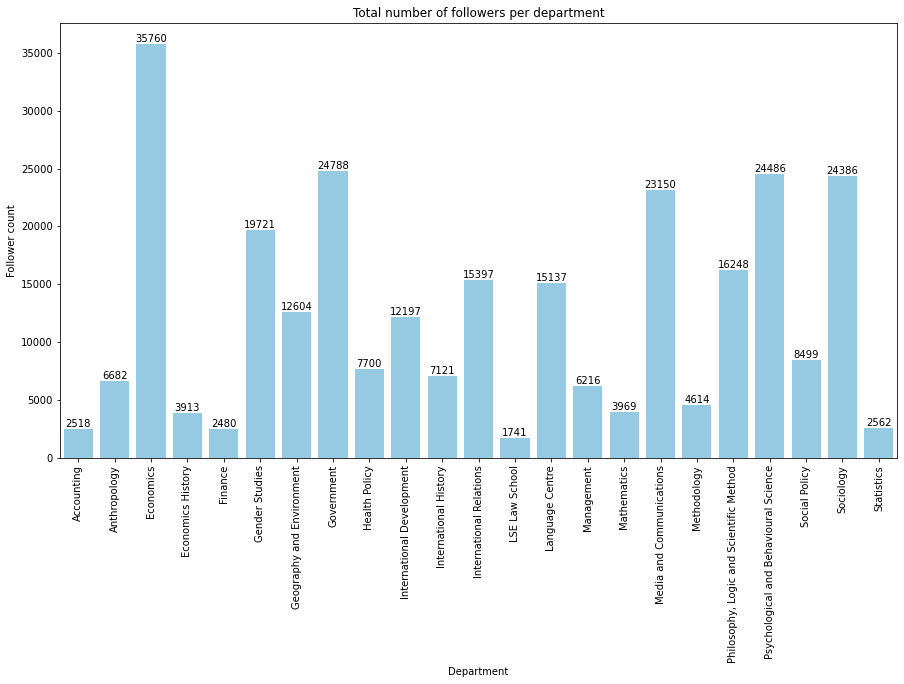

In [76]:
#Plotting the follower counts of each department
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Department', y = 'Follower count' , data =  dept_eng, color = '#89CFF0')
ax.bar_label(ax.containers[0])
ax.set_title('Total number of followers per department')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

The Economics department has the most followers, which we would expect, since they're the largest department at the LSE. Following the Economics department, the Psychology, Sociology, Government, and Media department follows closely. The Accounting, Economics History, Finance, Law, Mathematics and Statistics departments have the lowest following count. Again, we would expect this as these departments are relatively tinier. However, the only strange follower count is LSE Law School. It's particular strange when look at the size of the department.

Next, we can look at the engagement ratios to determine whether a high follower count necessarily means that a department is popular.

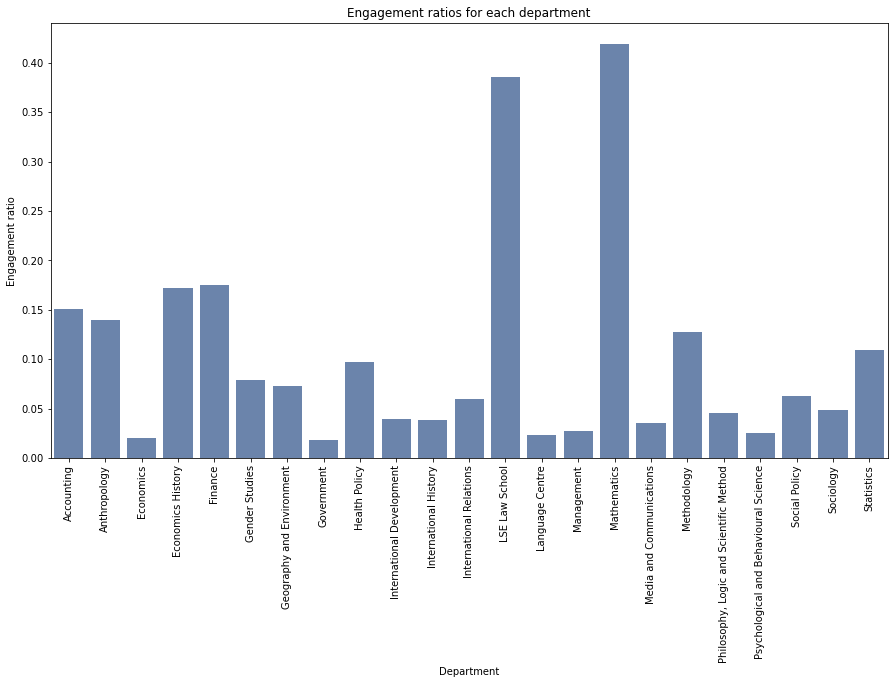

In [77]:
#Plotting the engagement ratios
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Department', y = 'Engagement ratio' , data =  dept_eng, color = '#6082B6')
ax.set_title('Engagement ratios for each department')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

Looking at the second plot of the engagement ratios, we can observe a pattern. For starters, departments with tinier following counts have higher engagement rates. For example, the LSE Law School and Mathematics department had the highest engagement ratio, whereas the Economics department had a low engagement ratio despite its follower count. 

This observation could indicate that users are more interactive with departments with small accounts. It also tells us that a higher following count doesn't necessarily mean that the account is popular. Some other explanations for the observations above may include:
* Smaller departments have a tighter sense of community
* It is harder to maintain engagement with a large following
* Larger department accounts may have many ghost followers

However, if we're looking at engagement ratios on a bigger scale, they range from 0.01 to 0.4. None of the departments has an engagement ratio above 0.5. If we compare this value to general social media analytics, the engagement rates for each department is high. The average is usually around 0.01 to 0.035.

#### Visualisation 2: Investigating engagements on a deeper level

We found that engagement ratios tell us more about an account's activity in comparison to the follower count. A good step forward would be to investigate types and numbers of engagement and sentiments each department receives. This further analysis could reveal a lot of information about what users expect from the department's Twitter accounts.

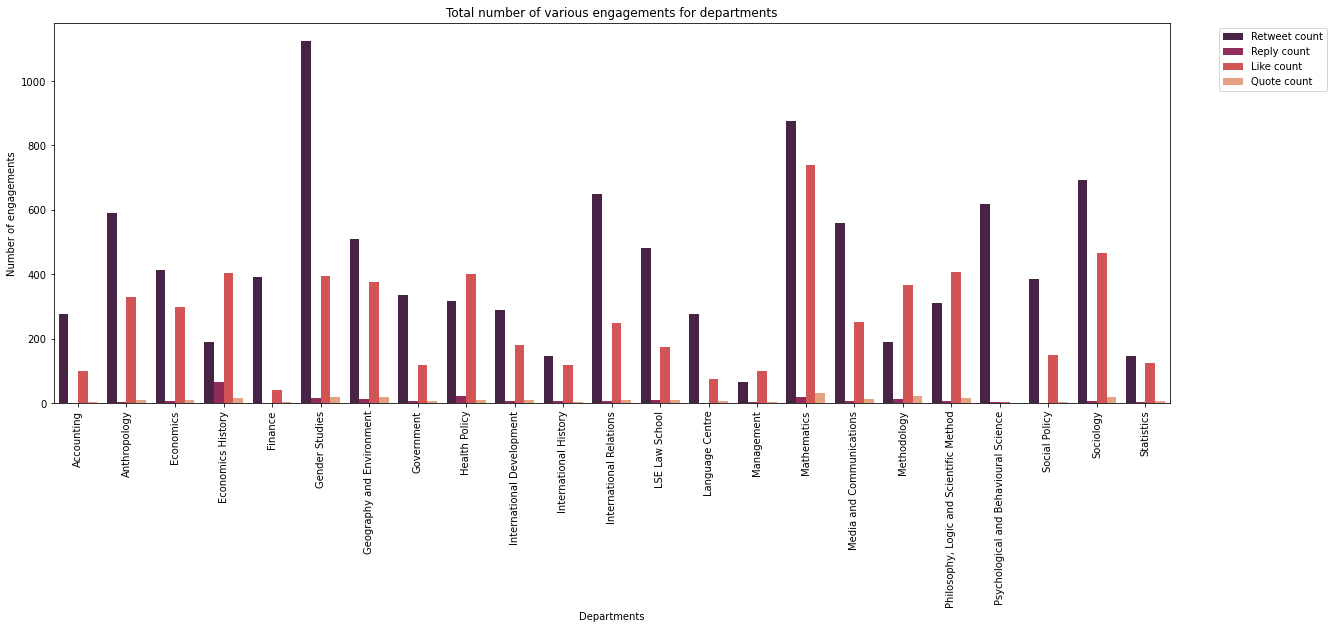

In [78]:
plt.figure(3,figsize=(20,7))
tweets_df_long = pd.melt(dept_eng.iloc[:,0:5].reset_index(), id_vars = 'Department', value_vars = dept_eng.iloc[:,1:5].columns,
       var_name = 'Engagement types', value_name = 'percentage')
sns.barplot(data = tweets_df_long, x = 'Department', y = 'percentage', hue = 'Engagement types', 
            palette = 'rocket')
plt.title('Total number of various engagements for departments')
plt.xlabel('Departments')
plt.ylabel('Number of engagements')
plt.legend(bbox_to_anchor= (1.04,1), loc = 'upper left')
plt.xticks(rotation = 90);

The bar chart above tells us that most engagement on the LSE department's accounts came from retweets. But let's look at the patterns of all types of engagements for each individual tweet to see if there is anything worth noting.

In [79]:
import plotly.express as px
px.line(tweets_stats, x = 'Tweet no', y = 'Retweet count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Retweet frequencies for department tweets')

In [80]:
px.line(tweets_stats, x = 'Tweet no', y = 'Reply count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Reply frequencies for department tweets')

In [81]:
px.line(tweets_stats, x = 'Tweet no', y = 'Like count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Like frequencies for department tweets')

In [82]:
px.line(tweets_stats, x = 'Tweet no', y = 'Quote count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Quote frequencies for department tweets')

Overall, for all department accounts, the highest form of engagement is retweets, followed by likes, and lastly, both replies and quotes. It is an unusual observation because for social media, the highest number of engagements are usually likes. Additionally, the plots also show that the replies on tweets are relatively constant, while the likes and quotes on the department's account can vary between large ranges.

Since retweets are the highest form of engagement for all the accounts, this indicates that content on Twitter is often shared, and posts can easily be circulated to multiple users.

#### Visualisation 3: Investigating engagement sentiments
Next, we can look at the sentiments of mentions. Mentions of an account are the most interactive form of engagement on Twitter so it would be interesting to find out whether popular accounts are receiving positive, neutral, or negative mentions from the public.

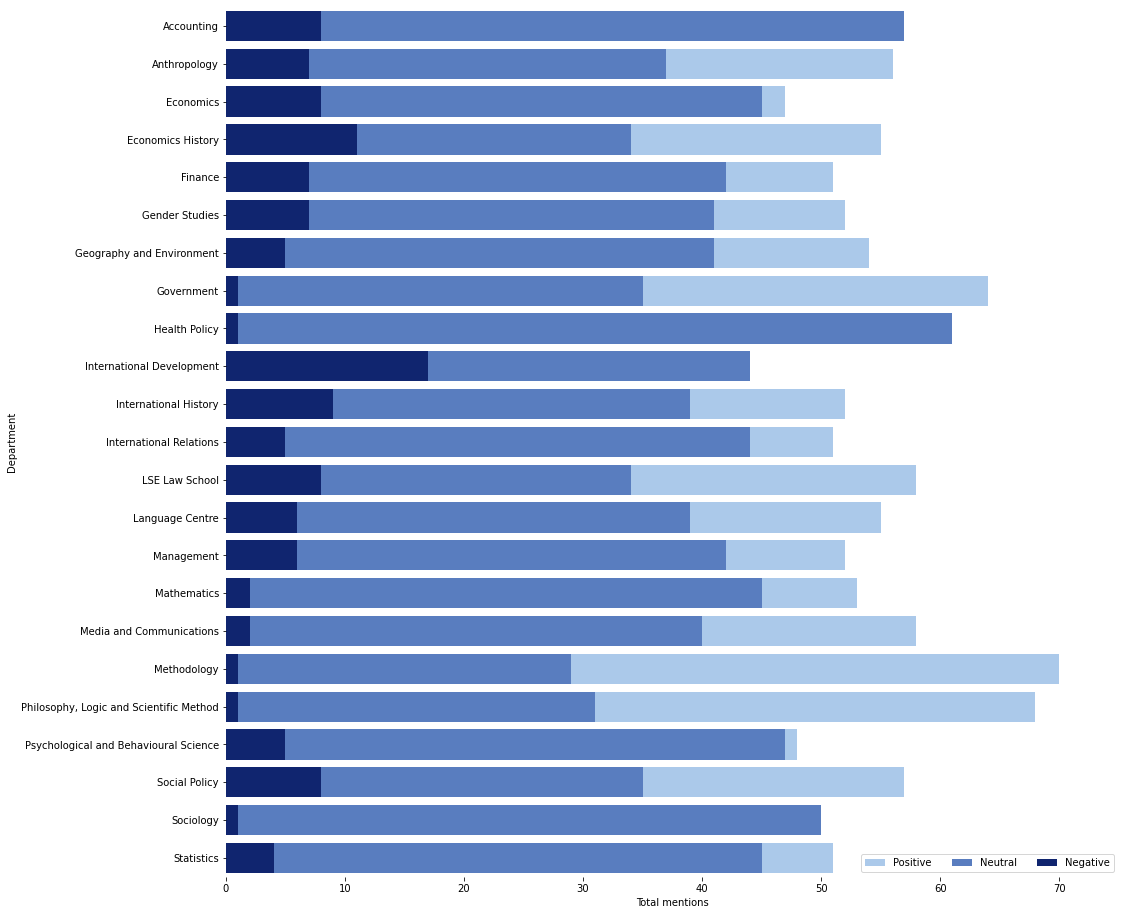

In [83]:
#Sentiments of mentions
f, ax = plt.subplots(figsize=(16, 16))

sns.set_color_codes('pastel')
sns.barplot(x = 'Positive mentions', y = 'Department', data = dept_eng,
            label = 'Positive', color = 'b')

sns.set_color_codes('muted')
sns.barplot(x = 'Neutral mentions', y = 'Department', data = dept_eng,
           label = 'Neutral', color = 'b')

sns.set_color_codes('dark')
sns.barplot(x = 'Negative mentions', y = 'Department', data = dept_eng,
           label = 'Negative', color = 'b')

ax.legend(ncol = 3, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 75), ylabel = 'Department', xlabel = 'Total mentions')
sns.despine(left = True, bottom = True)

Based on the stacked bar plots, most departments have a generally high number of positive mentions, followed by neutral and negative mentions. It is worth noting that the Philosophy, International Development and Economics History departments have the most negative mentions. 

We also have to check these sentiments against the subjectivity of the tweet to complete this section. For instance, if a tweet is negatively classified, but has a high subjectivity score, this tweet could have been classified differently depending on who's reading it.

In [84]:
px.scatter(mentions.iloc[:,[1,3,4]], x = 'Subjectivity', y = 'Polarity', 
           hover_name = 'Department', color = 'Department', width = 1000, height = 500, 
           title = 'Polarity to subjectivity for department tweets')

The scatterplot above shows some distinct pattern. The pattern shows that tweets with a higher subjectivity have a higher polarity score. However, tweets with a lower subjectivity score tend to have a polarity score closer to 0. This observation tells us that the tweets labelled positive were more opinionated. 

To conclude, even though most departments have positive tweets, we should also remember that positively classified tweets are classified this way because of the opinions in the tweet.

#### Visualisation 4: Investigating department categories
After some of the analysis above, I found it quite challenging to identify specific patterns for all 23 departments. So now, I'm looking into the possibility of classifying the departments under categories. After splitting the departments into categories, the analysis might give more interpretative results.

For the categories, we can split the departments into two classes. The two classes can be quantitative and qualitative departments. 

I'm hoping that splitting the departments into two categories can show specific patterns in the categories separately.

In [85]:
dept_categories = dept_eng

def cat(text):
    if text == 'Accounting':
        return 'Quantitative'
    elif text == 'Finance':
        return 'Quantitative'
    elif text == 'Mathematics':
        return 'Quantitative'
    elif text == 'Methodology':
        return 'Quantitative'
    elif text == 'Statistics':
        return 'Quantitative'
    else:
        return 'Qualitative'

In [86]:
dept_categories['Category'] = dept_categories['Department'].apply(cat)
dept_categories

Department  Retweet count  Reply count  \
0                                Accounting            277            1   
1                              Anthropology            589            3   
2                                 Economics            413            7   
3                         Economics History            188           64   
4                                   Finance            390            1   
5                            Gender Studies           1125           15   
6                 Geography and Environment            510           12   
7                                Government            335            6   
8                             Health Policy            316           21   
9                 International Development            288            5   
10                    International History            146            6   
11                  International Relations            650            7   
12                           LSE Law School            482            8   
13                          Language Centre            275            0   
14                               Management             65            4   
15                              Mathematics            877           18   
16                 Media and Communications            558            7   
17                              Methodology            189           14   
18  Philosophy, Logic and Scientific Method            311            6   
19    Psychological and Behavioural Science            617            2   
20                            Social Policy            384            1   
21                                Sociology            691            5   
22                               Statistics            147            4   

    Like count  Quote count  Follower count  Tweet count  Total engagement  \
0           99            3            2518          495               380   
1          329           10            6682          913               931   
2          297           11           35760        10194               728   
3          404           17            3913         1764               673   
4           40            3            2480          605               434   
5          394           19           19721         7243              1553   
6          376           20           12604         5338               918   
7          119            5           24788         8672               465   
8          400           10            7700         4557               747   
9          179            9           12197         5748               481   
10         118            2            7121         7601               272   
11         250           11           15397         3993               918   
12         173            8            1741          645               671   
13          74            6           15137         9754               355   
14         100            4            6216         6292               173   
15         738           31            3969         3781              1664   
16         252           14           23150        13342               831   
17         367           21            4614         1756               591   
18         408           16           16248         3504               741   
19           4            0           24486         1249               623   
20         149            4            8499         2946               538   
21         467           19           24386         6252              1182   
22         124            6            2562         2719               281   

    Engagement ratio  Positive mentions  Neutral mentions  Negative mentions  \
0           0.150913                 35                57                  8   
1           0.139330                 56                37                  7   
2           0.020358                 47                45                  8   
3           0.171991                 55

In [87]:
dept_cats = dept_categories.groupby('Category', as_index = False).sum()
dept_cats

Category  Retweet count  Reply count  Like count  Quote count  \
0   Qualitative           7943          179        4493          185   
1  Quantitative           1880           38        1368           64   

   Follower count  Tweet count  Total engagement  Engagement ratio  \
0          265746       100007             12800          1.391699   
1           16143         9356              3350          0.982931   

   Positive mentions  Neutral mentions  Negative mentions  
0                953               739                108  
1                260               218                 22

The table shows the data respectively for quantitative and qualitative departments. There is a disparity in the numbers because there are more qualitative than quantitative  departments at the LSE. Looking at the averages may be a better way to go.

In [88]:
dept_cats_avg = dept_categories.groupby('Category', as_index = False).mean()
dept_cats_avg

Category  Retweet count  Reply count  Like count  Quote count  \
0   Qualitative     441.277778     9.944444  249.611111    10.277778   
1  Quantitative     376.000000     7.600000  273.600000    12.800000   

   Follower count  Tweet count  Total engagement  Engagement ratio  \
0    14763.666667  5555.944444        711.111111          0.077317   
1     3228.600000  1871.200000        670.000000          0.196586   

   Positive mentions  Neutral mentions  Negative mentions  
0          52.944444         41.055556                6.0  
1          52.000000         43.600000                4.4

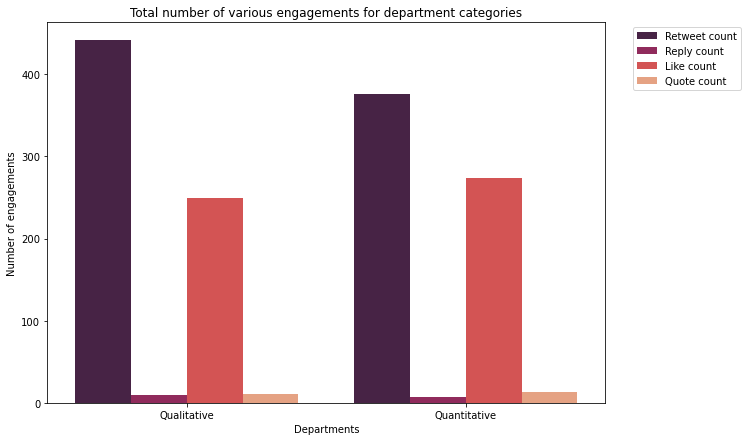

In [89]:
plt.figure(3,figsize=(10,7))
cat_df_long = pd.melt(dept_cats_avg.iloc[:,0:5].reset_index(), id_vars = 'Category', value_vars = dept_eng.iloc[:,1:5].columns,
       var_name = 'Engagement types', value_name = 'percentage')
sns.barplot(data = cat_df_long, x = 'Category', y = 'percentage', hue = 'Engagement types', 
            palette = 'rocket')
plt.title('Total number of various engagements for department categories')
plt.xlabel('Departments')
plt.ylabel('Number of engagements')
plt.legend(bbox_to_anchor= (1.04,1), loc = 'upper left');

We find that, on average, qualitative departments have higher retweets and replies, but quantitative departments have a higher number of likes and quotes per tweet. And similar to the observations earlier, the quantitative departments have fewer follows but a higher engagement ratio. There isn't a significant difference between the categories of departments.

#### Visualisation 5: Identifying the patterns of the users that actively interact with each department's accounts
Now that we've analysed all the data above, we can attempt to find out whether the users who often mention the department have a relationship with other departments. We can start visualising this using a NetworkX graph.

In [90]:
#NetworkX graph of users who mention departments
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

In [91]:
for i in range(0, len(mentions)):
    g.add_edge(mentions['User ID'][i], mentions['Department'][i])

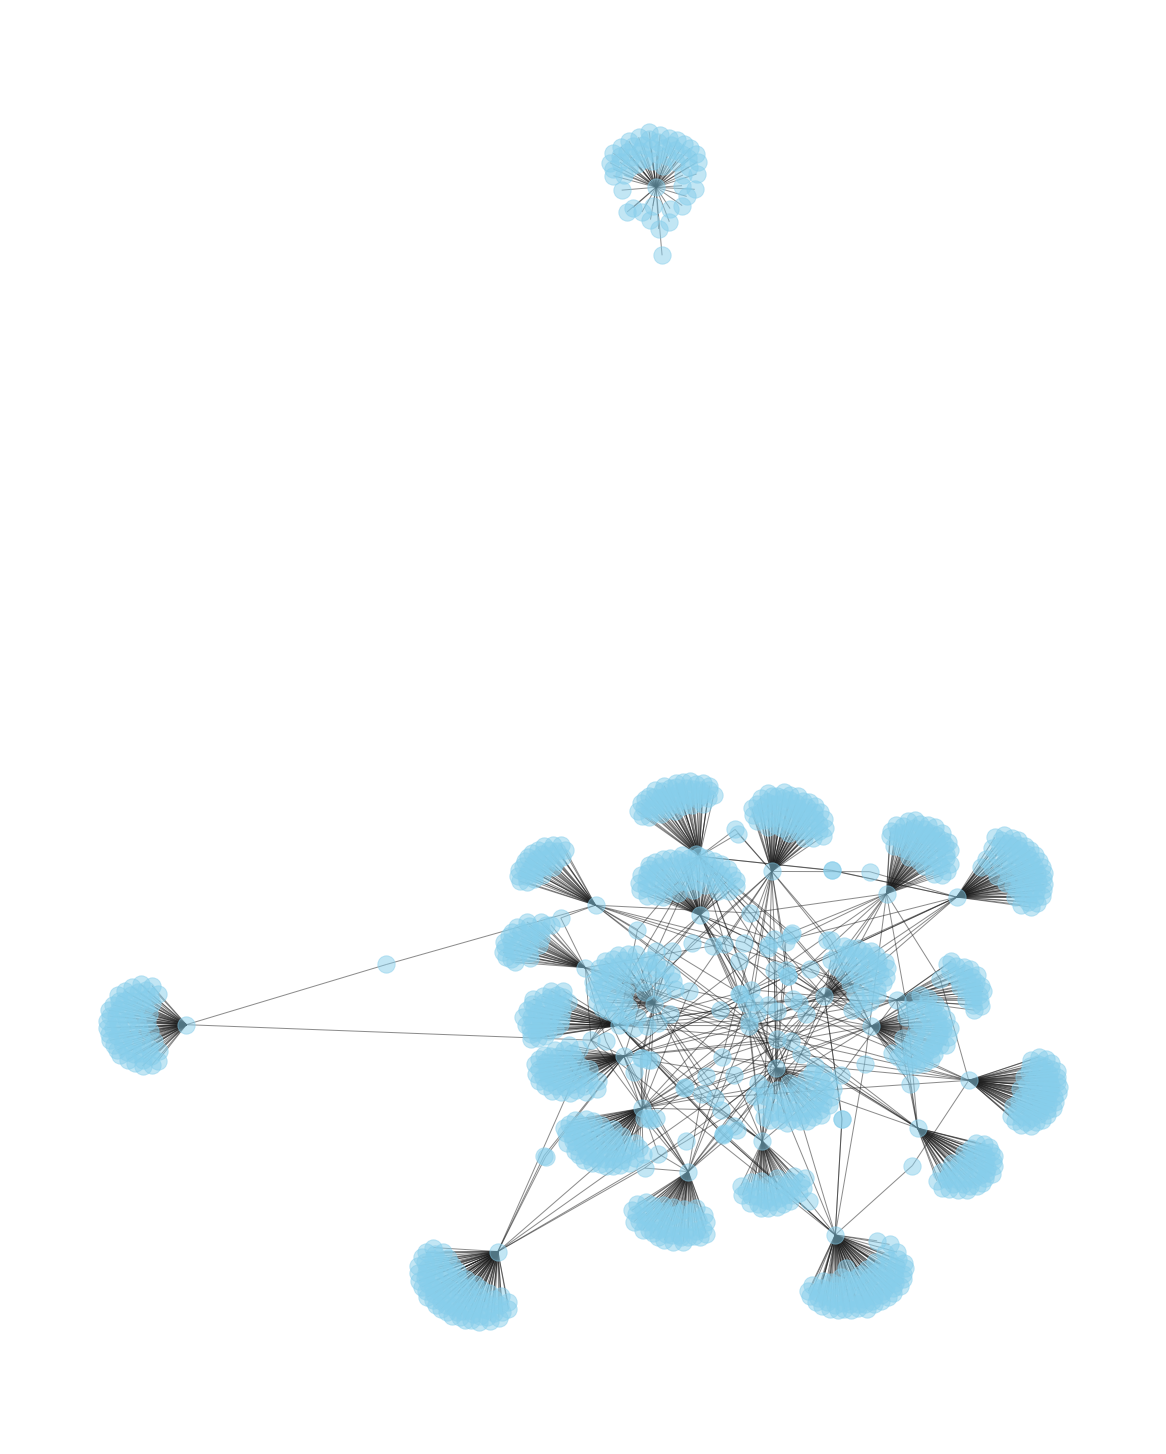

In [92]:
plt.figure(3,figsize=(16,20))
nx.draw(g, with_labels = False, node_color = 'skyblue',
       node_shape = 'o', alpha = 0.5)
plt.show()

Now that thewe've plotted the graph, we can look more into the interactions between users and departments.

In [93]:
cc = g.subgraph(max(nx.connected_components(g), key=len))

The spring layout seems to be the easiest to visualise, so we will use this layout.

In [94]:
pos = nx.spring_layout(cc)

Before we draw a graph that explains the interactions between users and departments, we need to look at the betweeness and closeness centralities. The betweeness centrality scores tell us which users mention other users the most, and the closeness centrality tells us how close each node is to other nodes in the network. Let's explore these two factors now.

In [95]:
between = nx.betweenness_centrality(cc)
pd.Series(between).sort_values(ascending = False).head(22)

601000227                                0.199961
21643972                                 0.153605
International Relations                  0.135010
Health Policy                            0.133350
International Development                0.109570
21861323                                 0.109543
Finance                                  0.107854
Sociology                                0.107469
Management                               0.103005
Psychological and Behavioural Science    0.102415
Media and Communications                 0.102009
LSE Law School                           0.100954
Social Policy                            0.099835
Gender Studies                           0.095444
2438234042                               0.091010
Economic History                         0.089262
Anthropology                             0.087755
768457181846962176                       0.087191
Geography and Evironment                 0.085943
Methodology                              0.084565


In this simplified list, most departments are the accounts that bridge networks.

In [96]:
close = nx.closeness_centrality(cc)
pd.Series(close).sort_values(ascending = False).head(22)

21643972                     0.358120
International Development    0.349695
21861323                     0.349391
Finance                      0.349289
Sociology                    0.349289
Management                   0.348682
Social Policy                0.347475
601000227                    0.345580
2438234042                   0.341657
International Relations      0.340594
Gender Studies               0.336595
Economic History             0.335469
Geography and Evironment     0.335283
Methodology                  0.335096
768457181846962176           0.334444
Government                   0.333795
International History        0.333057
Accounting                   0.331042
LSE Law School               0.327263
Statistics                   0.321495
Mathematics                  0.318940
Economics                    0.318098
dtype: float64

Based on this list, most departments connect to most users and other departments. Let's visualise the closeness centrality because the closeness of the nodes can reveal information about interactions of the departments within Twitter.

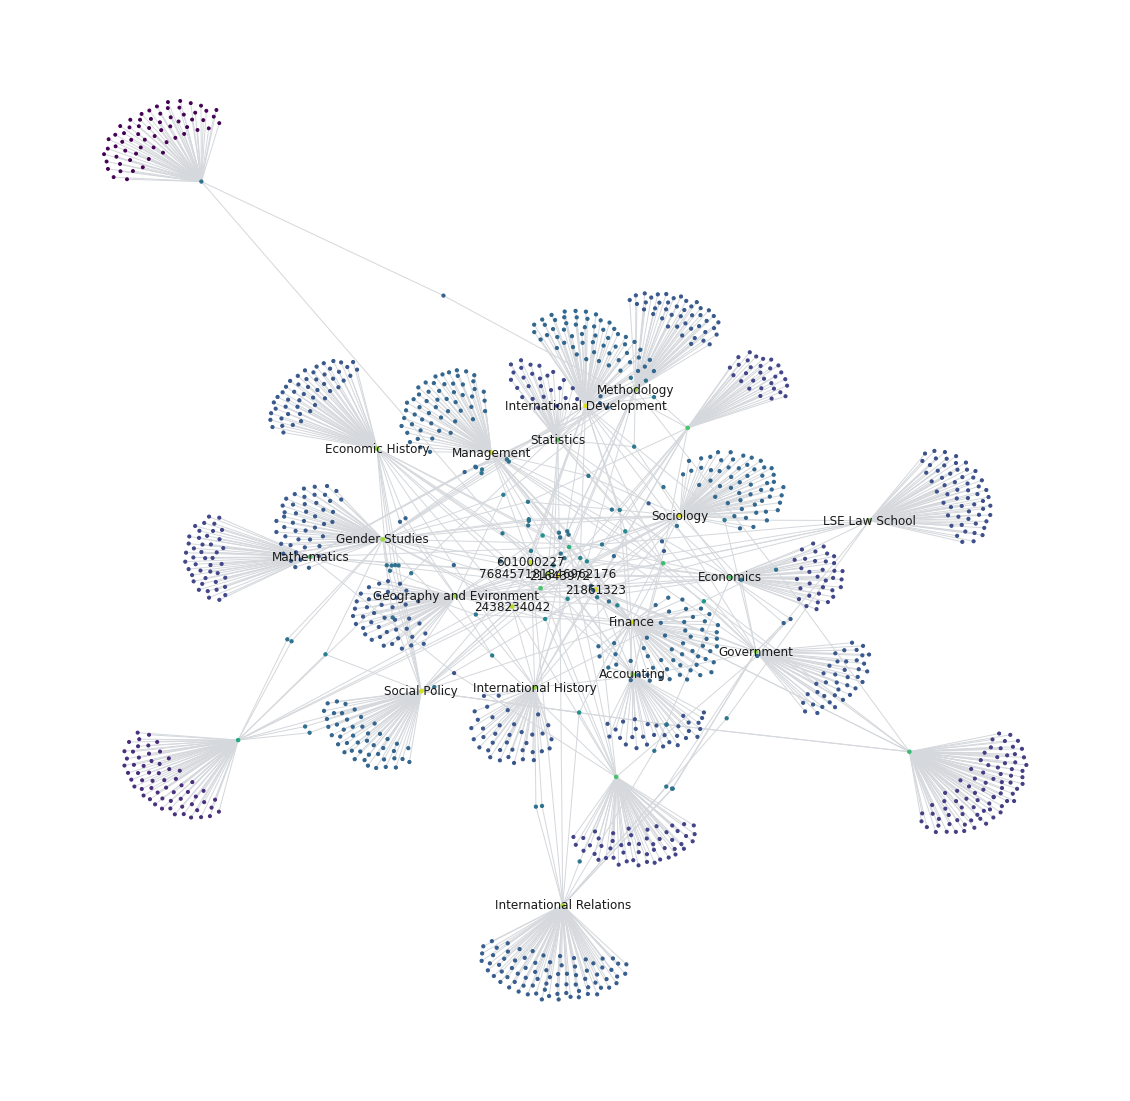

In [97]:
import numpy as np

nsize = np.array([v for v in close.values()])
cutoff = sorted(nsize, reverse=True)[22]
labels = {n: (n if v > cutoff else '') for n, v in close.items()}

fig, ax = plt.subplots(figsize=(20,20))
nx.draw(cc, pos = pos, node_color = nsize, with_labels = True, labels = labels, edge_color = '#D5D8DC', node_size = nsize * 40)

From the graph created above, these are a few features I have noticed:
1. Department accounts have specialised audiences 
2. Departments on Twitter are close to each other


For the first observation, the graph shows that many users only mention one department account instead of many. This pattern could explain the types of audience for each account. It is likely that only students from that particular department only interact with their department. 

In the second observation, the closeness centrality network and scores tells us that most departments are close to each other. It could indicate that most of the mentions on each Twitter account are from other departments. 

To conclude this section, departments on Twitter don't have too many mentions from individual from other departments. However, by observing the mentions that the departments received, we can also say that most departments have a niche audience. It is highly likely that the niche audience compromises of professors, teachers and students of that particular department. Building on this observation, if departments wanted to build a large following on Twitter, they could look into either concentrating on their niche, or try appealing to a wide range of audiences.

### Part 4: Conclusion

To conclude this entire project, we have to circle back to the questions we wanted to answer in the introduction. To decide whether Twitter is an effective social media platform, we need to find out how successful the LSE departments on Twitter are. A successful Twitter account includes several factors. An outstanding account will have high engagement ratios concerning its target audience. Typically, accounts can become successful by creating a variety of content that is catered to their audience.

The following question we have to answer is whether Twitter has an active audience that's worth maintaining. Based on the network graphs in the previous section, most departments have a niche audience. A niche audience could be an advantage or disadvantage. An advantage of a niche audience is that it is easier to build a loyal community from these groups of individuals. A downside is that it is hard to expand out of this niche audience. We can relate this back to our definition of a successful Twitter account and the data analysis. Based on the engagement ratios, the smaller departments had higher engagement rates compared to larger departments. Therefore, we can tell that building a strong community is beneficial to be successful on Twitter.

From the data analysis, growing as an account on Twitter seems doable. Tweets are shared often on Twitter. For instance, we found that the retweet count is the highest form of engagement for all department's accounts. Furthermore, when we explored the connections between the users who mention each department, we found that most departments interacted with each other. Therefore, if a department wants to consider using Twitter, interacting with other departments helps grow their accounts. It tells us that it should be easy to get shares on Twitter. However, it is worth noting that the more interactive forms of engagements like replies and quotes is low.

The last thing we can look at is whether Twitter accounts need to necessarily receive positive or negative attention to grow. We found that most departments with high engagement ratios typically had a high level of positive and neutral mentions. Again, we should expect this. Accounts with less negative attention tend to have better engagement ratios. One extra point to note is that the polarity scores determined the sentiment classifications. Classifications can be affect based on subjectivity, therefore, the positive scores could be overstated, and this observation may not be accurate. It makes it quite hard to determine what kind of responses departments should get from their audience. 

As a whole, Twitter seems like a social media platform that is lacking in many areas. However, before we decide on a recommendation, we should look at the limitations. The analysis only included the last 100 tweets. A more in-depth analysis would include tweets dating back to the start of each department's account. The next downside is that I couldn't perform data analysis on other social media platforms like Facebook and Instagram. Using three platforms to analyse would give a better comparison. Lastly, we only compared LSE departments to each other in the analysis. If we carried out the analysis comparing LSE departments to other university's departments, we could perhaps find that LSE's accounts performed far better than other universities. 

If we were making a conclusion using this analysis alone, Twitter isn't a very effective social media platform. I have made this conclusion because despite the high retweet count on Twitter, it's hard to garner a large and loyal audience. Apart from the difficulty in growing, it's also hard to determine what kind of content would make a department's account successful. 

### Part 5: References

1. Carol Feigenbaum, What is Social Media Analytics [Online] - Available at: https://netbasequid.com/blog/what-is-social-media-analytics-why-is-it-important/ [Accessed 13 April 2022]
2. Euge Inzaugarat, Visualising Twitter interactions[Online] - Available at: https://medium.com/future-vision/visualizing-twitter-interactions-with-networkx-a391da239af5 [Accessed 10 April 2022]
3. Sloria, TextBlob for sentiment classification [Online] - Available at: https://textblob.readthedocs.io/en/dev/ [Accessed 1 April 2022]

[The code was last run on 23rd April 2022]